### Flight Ticket Price Prediction

* Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

* Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

### Data Overview

Here each data point corresponds to trip of flight from one city to another.

* Airline: The name of the airline.

* Date_of_Journey: The date of the journey

* Source: The source from which the service begins.

* Destination: The destination where the service ends.

* Route: The route taken by the flight to reach the destination.

* Dep_Time: The time when the journey starts from the source.

* Arrival_Time: Time of arrival at the destination.

* Duration: Total duration of the flight.

* Total_Stops: Total stops between the source and destination.

* Additional_Info: Additional information about the flight

* Price(target): The price of the ticket

### Type of Machine Learning task :
It is an regression problem where given a set of features we need to predict the price of ticket from one city to another.

### Performace Metric
Since it is an regression problem we will use Root Mean Squared error (RMSE) and R-squared as regression metric.

#### IMPORTING LIBRARIES

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df=pd.read_excel("/content/Data_Train.xlsx")

In [94]:
pd.set_option("display.max_columns",50)

In [95]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [96]:
df.shape

(10683, 11)

We have 10683 instances with 11 features

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


All independent variables are of data type "object" and dependent variable (price) is of Dtype "int"

In [98]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


The max. ticket price for a flight is 79512.0 and the min. ticket cost 1759.0

In [99]:
df.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


## Data cleaning

In [100]:
print("We can see there are 1 missing value in both Route and Total_Stops column.")

We can see there are 1 missing value in both Route and Total_Stops column.


In [101]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [102]:
df[df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


Comes out they are in the same row.

In [103]:
print("It's negligible so we drop that row.")
print("Shape before droping ",df.shape)
df.dropna(inplace=True)
print("Shape after droping ",df.shape)

It's negligible so we drop that row.
Shape before droping  (10683, 11)
Shape after droping  (10682, 11)


In [104]:
# Looking for the duplicate values
df.drop_duplicates().shape

(10462, 11)

It looks like there were around ( 10682-10462 )220 duplicate rows. So it is good idea to drop them.

In [105]:
df=df.drop_duplicates()
df.shape

(10462, 11)

## Handling categorical data

In [106]:
print("There are 12 unique Airlines.")

There are 12 unique Airlines.


In [107]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [108]:
df["Airline"].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

The Jet Airways has the most occuring frequeny.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

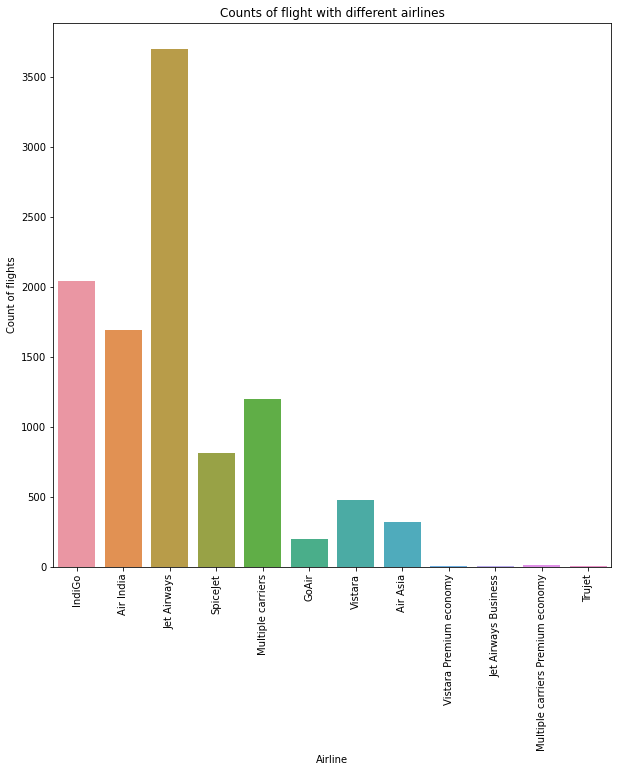

In [109]:
plt.figure(figsize=(10,10))
plt.title("Counts of flight with different airlines")
sns.countplot(x='Airline',data=df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

The 'Vistara Premium economy', 'Trujet' airlines have almost negligible flights.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

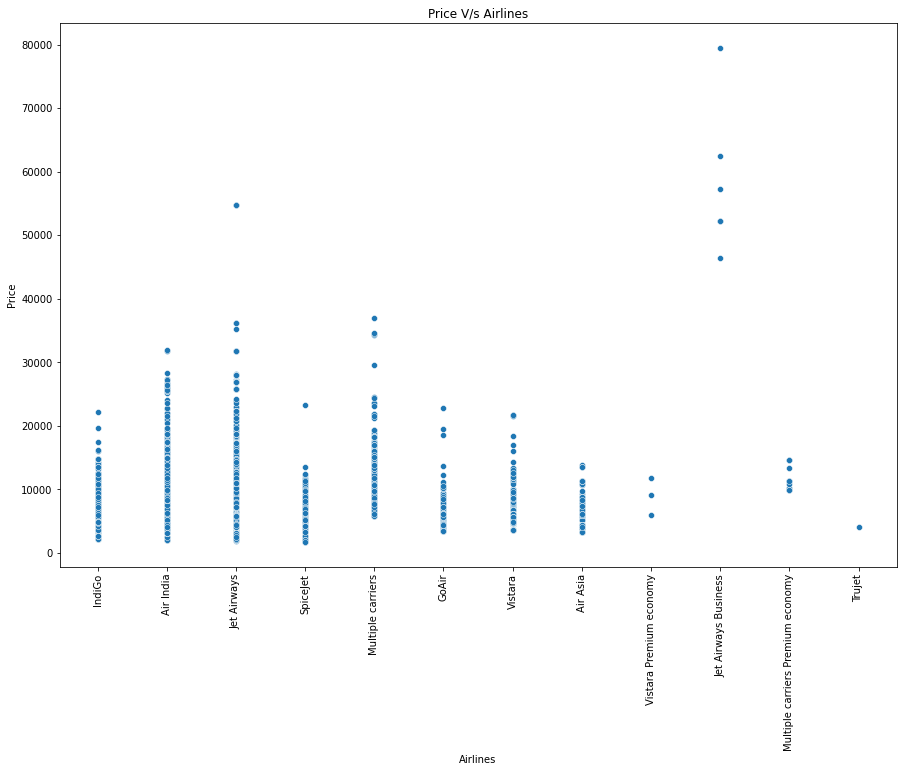

In [110]:
plt.figure(figsize=(15,10))
plt.title("Price V/s Airlines")
plt.xlabel("Airlines")
plt.ylabel("Price")
sns.scatterplot(df["Airline"],df["Price"])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

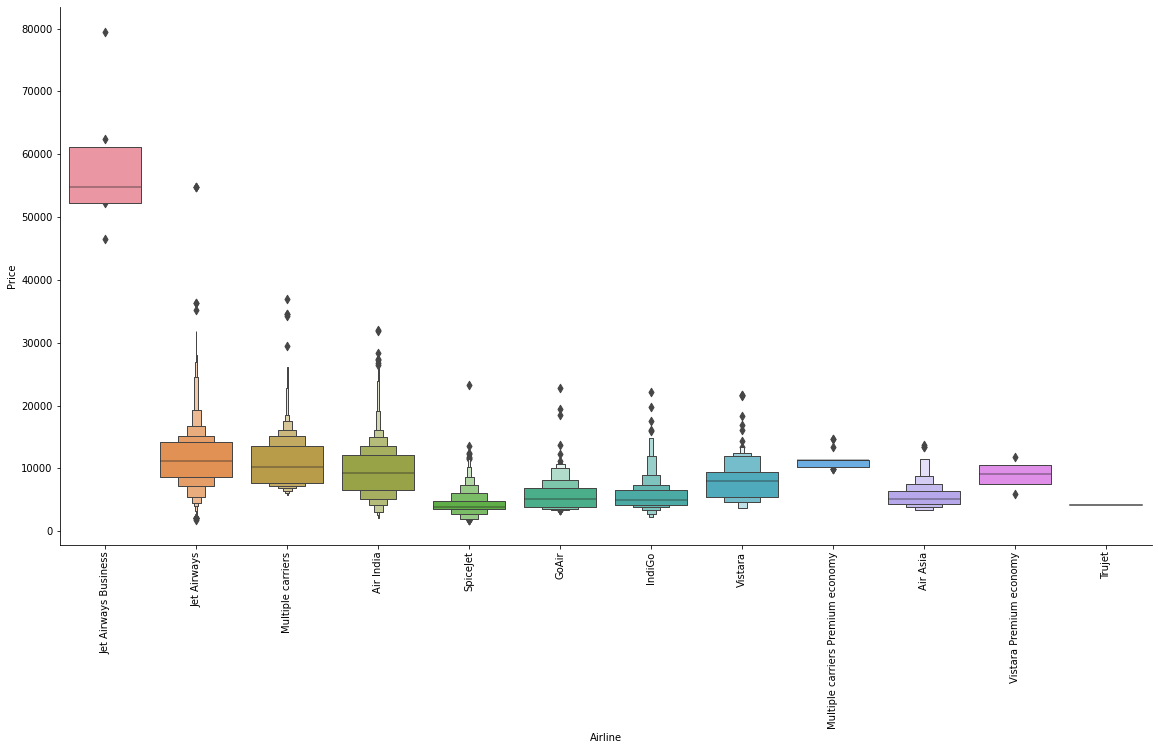

In [111]:
sns.catplot(y = "Price", x = "Airline", data =df.sort_values("Price",ascending=False), kind="boxen", height = 8, aspect = 2)
plt.xticks(rotation = 90)

Highest price airlines is 'Jet Airways Business' following by "Jet Airways", "Multiple carriers Premium economy" and the minimum price airline is "Trujet"

In [112]:
# Converting sparse classes of Airline into one category
df["Airline"].replace(['Trujet', 'Vistara Premium economy'], 'Another', inplace = True)

In [113]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Another',
       'Jet Airways Business', 'Multiple carriers Premium economy'],
      dtype=object)

In [114]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

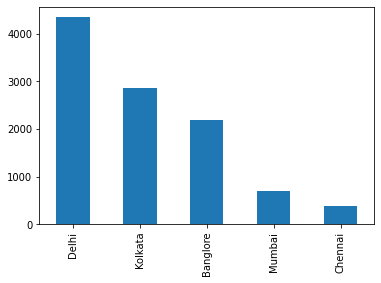

In [115]:
df["Source"].value_counts().plot.bar()

In [116]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

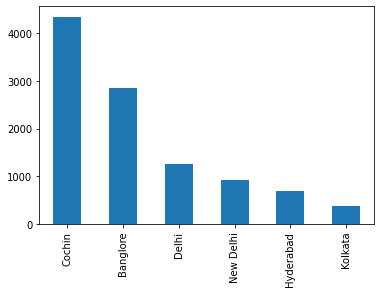

In [117]:
df["Destination"].value_counts().plot.bar()

There are 5 different sources and 6 different destinations. Most flights takes off from Delhi and most of the flight destination is Cochin.

In [118]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

"No info" is same as "No Info".So replacing them with common label

In [119]:
df["Additional_Info"].replace("No Info","No info",inplace=True)

In [120]:
df["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

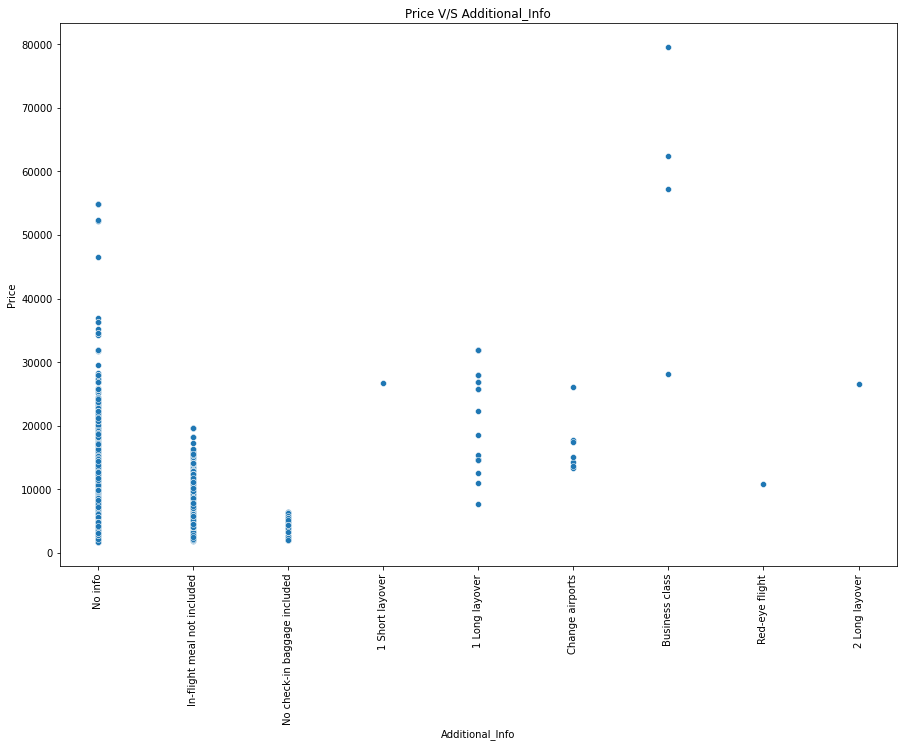

In [121]:
plt.figure(figsize=(15,10))
plt.title("Price V/S Additional_Info")
plt.xlabel("Additional_Info")
plt.ylabel("Price")
sns.scatterplot(df["Additional_Info"],df["Price"])
plt.xticks(rotation=90)

Business class has the highest price which is kinda obvios.

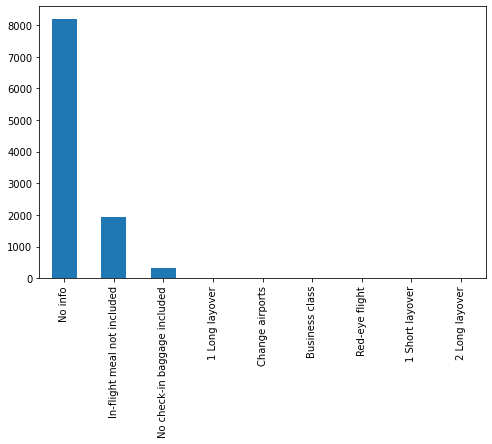

In [122]:
plt.figure(figsize=(8,5))
df["Additional_Info"].value_counts().plot.bar()

In [123]:
df["Additional_Info"].value_counts()/len(df["Additional_Info"])

No info                         0.782355
In-flight meal not included     0.184095
No check-in baggage included    0.030396
1 Long layover                  0.001816
Change airports                 0.000669
Business class                  0.000382
Red-eye flight                  0.000096
1 Short layover                 0.000096
2 Long layover                  0.000096
Name: Additional_Info, dtype: float64

Dropping Additional_Info features.

In [124]:
# More than 75% of data shows No_info or No Info which is useless.
df.drop(["Additional_Info"],axis=1,inplace=True)

In [125]:
# Airline, Source, Destination is Nominal Categorical data we will perform OneHotEncoding
df = pd.get_dummies(df, columns = ['Airline', 'Source', 'Destination'],drop_first=True)

In [126]:
df.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [127]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [128]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

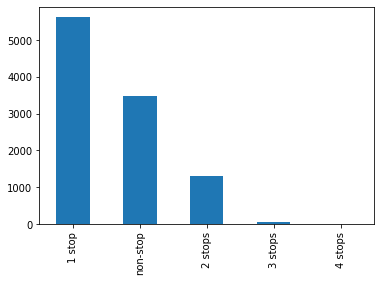

In [129]:
df["Total_Stops"].value_counts().plot.bar()

Text(0, 0.5, 'Price')

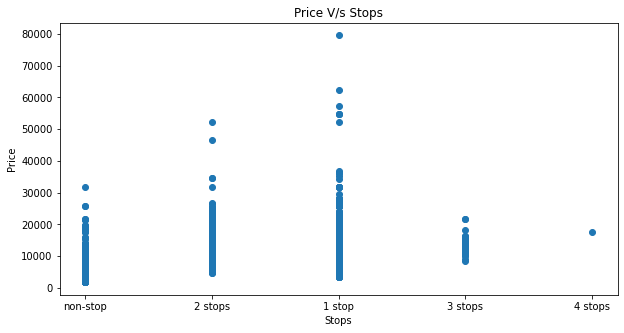

In [130]:
plt.figure(figsize=(10,5))
plt.title("Price V/s Stops")
plt.scatter(df["Total_Stops"],df["Price"])
plt.xlabel("Stops")
plt.ylabel("Price")

In [131]:
# As expected less the stop more the price is.

In [132]:
# As Total_Stops is Ordinal Category performing LabelEncoding
df["Total_Stops"].replace({"non-stop":0,"1 stop":1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [133]:
df["Total_Stops"]

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10462, dtype: int64

In [134]:
df.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,24/03/2019,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,3897,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1/05/2019,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,7662,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# Handling Continuous Text data

Sorting the entire dataset on date of journey.

In [135]:
df.sort_values('Date_of_Journey', inplace = True)

In [136]:
df["Journey_Day"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["Journey_Month"]=pd.to_datetime(df.Date_of_Journey,format="%d/%m/%Y").dt.month


In [137]:
df.head(2)

,Date_of_Journey,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month
8536,01/03/2019,BLR → BOM → DEL,14:05,09:30 02 Mar,19h 25m,1,25735,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3
10149,01/03/2019,BLR → VGA → VTZ → DEL,10:30,17:45,7h 15m,2,17461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3


Text(0, 0.5, 'No of flights')

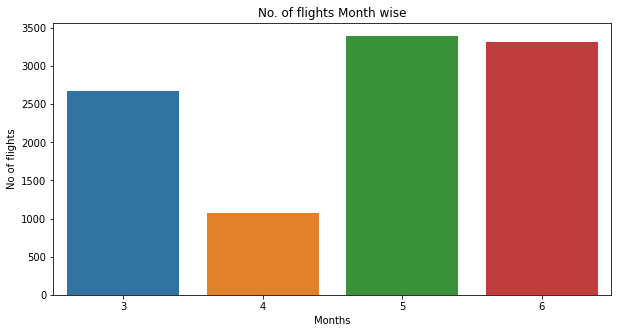

In [138]:
plt.figure(figsize=(10,5))
plt.title("No. of flights Month wise")
sns.countplot(x="Journey_Month",data=df)
plt.xlabel("Months")
plt.ylabel("No of flights")

Most of the flights are in May and June 

In [139]:
df["Journey_Month"].unique()

array([3, 4, 5, 6])

In [140]:
# Now we can drop Data_of_Journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [141]:
#  Route gives same information as Total_Stops. so we can drop "Route"
df.drop(["Route"],axis=1,inplace=True)

In [142]:
# Departure time is when a plane leaves the gate. 

def flight_dep_time(X):
    '''
    This function takes the flight Departure time 
    and convert into appropriate format.
    '''
    if int(X[:2]) >= 0 and int(X[:2]) < 6:
        return 'mid_night'
    elif int(X[:2]) >= 6 and int(X[:2]) < 12:
        return 'morning'
    elif int(X[:2]) >= 12 and int(X[:2]) < 18:
        return 'afternoon'
    elif int(X[:2]) >= 18 and int(X[:2]) < 24:
        return 'evening'
    

In [143]:
df['flight_time'] = df['Dep_Time'].apply(flight_dep_time)

Text(0, 0.5, 'Count of flights')

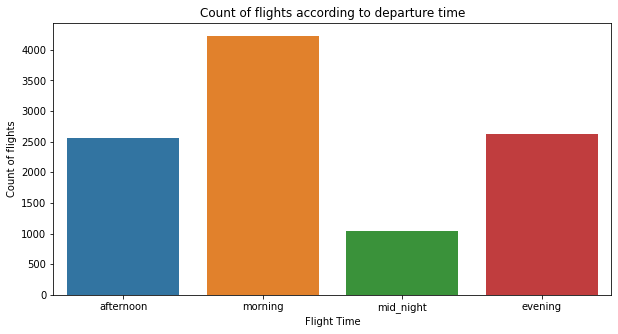

In [144]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights according to departure time')
sns.countplot(x = 'flight_time', data = df)
plt.xlabel('Flight Time')
plt.ylabel('Count of flights')

There are more number of flights in the morning time as compared to other time.

In [145]:
df["flight_time"]

8536     afternoon
10149      morning
5701       morning
4829     mid_night
6558       evening
           ...    
6944     afternoon
8086       evening
3683     afternoon
3693     afternoon
6586     afternoon
Name: flight_time, Length: 10462, dtype: object

In [146]:
# Now we can drop flight_time as it is of no use
df.drop(["flight_time"],axis=1,inplace=True)

In [147]:
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour

# Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [148]:
# Arrival time is when the plane pulls up to the gate.

# Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour

# Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [149]:
df.head(4)

,Duration,Total_Stops,Price,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
8536,19h 25m,1,25735,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,14,5,9,30
10149,7h 15m,2,17461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,10,30,17,45
5701,38h 35m,2,25430,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,8,50,23,25
4829,14h 35m,1,27992,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,5,45,20,20


In [150]:
duration = list(df["Duration"])

for i in range(len(duration)):    # Check if duration contains only hour or mins
    if len(duration[i].split()) != 2:     
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"     # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]     # Adds 0 hour

In [151]:
duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))   
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [152]:
# Adding duration_hours and duration_mins list to train_data dataframe

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

In [153]:
# dropping Duration

df.drop(["Duration"], axis = 1, inplace = True)
df.head(2)

,Total_Stops,Price,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
8536,1,25735,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,14,5,9,30,19,25
10149,2,17461,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,10,30,17,45,7,15


In [154]:
df["Total_duration"]=(df["Duration_hours"]*3600)+(df["Duration_mins"]*60)

Text(0, 0.5, 'Price')

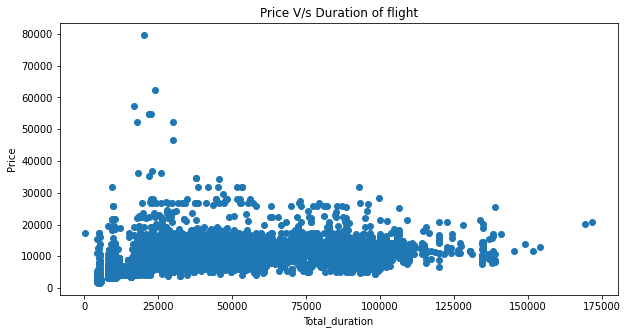

In [155]:
plt.figure(figsize=(10,5))
plt.title("Price V/s Duration of flight")
plt.scatter(df["Total_duration"],df["Price"])
plt.xlabel("Total_duration")
plt.ylabel("Price")

In [156]:
#  Dropping "Total_duration" as we have "Duration_hours" and "Duration_mins"
df.drop(["Total_duration"],axis=1,inplace=True)

In [157]:
df.columns

Index(['Total_Stops', 'Price', 'Airline_Air India', 'Airline_Another',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways',
       'Airline_Jet Airways Business', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi',
       'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi',
       'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins'],
      dtype='object')

In [158]:
y=df["Price"]
X=df.drop(["Price"],axis=1)

In [159]:
X.head(2)

,Total_Stops,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Journey_Day,Journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
8536,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,14,5,9,30,19,25
10149,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3,10,30,17,45,7,15


# Feature Selection 

 [Feature selection techniques](https://github.com/harshmalviya7/Machine-Learning-Feature-Selection/blob/master/featureselection.ipynb#machine-learning-feature-selection)

1. Univariate Selection

The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.


In [160]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [161]:
bestfeatures=SelectKBest(score_func=chi2, k=10)#for best 10 feature
fit = bestfeatures.fit(X,y)

In [162]:
dfscores = pd.DataFrame(fit.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)
rank=pd.concat([dfcolumns,dfscores],axis=1)

In [163]:
rank.columns=["Features","Score"]

In [164]:
rank.nlargest(10,"Score")

,Features,Score
23,Dep_min,66888.808672
26,Duration_hours,56965.976056
25,Arrival_min,49859.587431
27,Duration_mins,43259.559538
20,Journey_Day,22040.278740
24,Arrival_hour,18520.476928
22,Dep_hour,10635.788092
2,Airline_Another,10458.000000
6,Airline_Jet Airways Business,10456.000000
8,Airline_Multiple carriers Premium economy,10449.000000


Data Standardization

In [165]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
X = s.fit_transform(X)

In [166]:
print(X.mean())
X.std()

5.336298777453848e-18


1.0

In [167]:
# Splitting data into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [168]:
print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (8369, 28)
The size of training output is (8369,)
**************************************************
The size of testing input is (2093, 28)
The size of testing output is (2093,)


Machine Learning Models

In [169]:
from sklearn.model_selection import GridSearchCV

1. KNN Regressor

In [170]:
from sklearn.neighbors import KNeighborsRegressor
k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv = 10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [171]:
print(knn_regressor.best_estimator_)
knn_regressor.best_params_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


{'n_neighbors': 5}

In [172]:
y_train_pred =knn_regressor.predict(X_train) ##Predict train result
y_test_pred =knn_regressor.predict(X_test) ##Predict test result

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


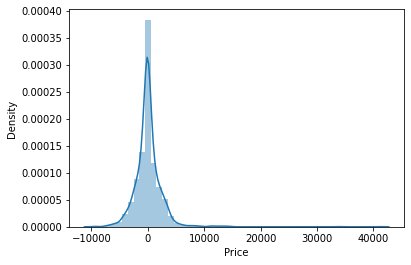

In [173]:
sns.distplot(y_test-y_test_pred)
plt.show()

In [174]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [175]:
print("Train Results for KNN Regressor Model:")
print()
print("Root mean squared error: ", np.sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print()
print("Test Results for KNN Regressor Model:")
print()
print("Root mean squared error: ", np.sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for KNN Regressor Model:

Root mean squared error:  1827.3502954345884
R-squared:  0.8378113808508241

Test Results for KNN Regressor Model:

Root mean squared error:  2474.4069035273087
R-squared:  0.75047067869712


2. Random Forest Regressor

In [187]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
tuned_params = {'n_estimators': [200, 300, 400, 500,600,700,800], 'min_samples_split': [2, 5, 10,15,18], 'min_samples_leaf': [1, 2, 4,8,10],'max_depth':[5,10,15],'max_features' :['auto', 'sqrt']}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [188]:
print(random_regressor.best_estimator_)
random_regressor.best_params_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=15, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [189]:
y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

In [190]:
print("Train Results for RandomForest Regressor Model:")
print()
print("Root mean squared error: ", np.sqrt(mse(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))
print()
print("Test Results for RandomForest Regressor Model:")
print()
print("Root mean squared error: ", np.sqrt(mse(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for RandomForest Regressor Model:

Root mean squared error:  1261.9258707853062
R-squared:  0.9226528263719701

Test Results for RandomForest Regressor Model:

Root mean squared error:  2174.766924510199
R-squared:  0.8072453842236327


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


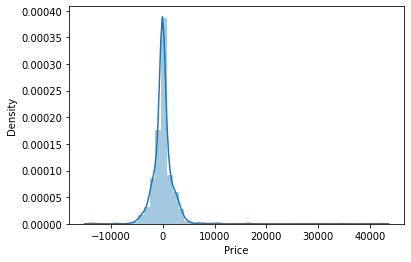

In [191]:
sns.distplot(y_test-y_test_pred)
plt.show()

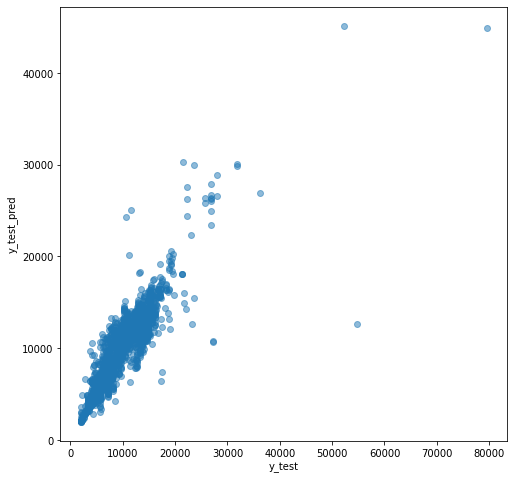

In [193]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, y_test_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_test_pred")
plt.show()

Save the model

In [194]:
import pickle
# open a file, where you ant to store the data
file = open('flight.pkl', 'wb')

# dump information to that file
pickle.dump(random_regressor, file)